In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow import keras

Using TensorFlow backend.


In [2]:
data = pd.read_csv("pulsar_stars.csv")

In [3]:
data.head()
list(data.columns.values)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [4]:
columns = " Mean of the integrated profile, Standard deviation of the integrated profile, Excess kurtosis of the integrated profile, Skewness of the integrated profile, Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess kurtosis of the DM-SNR curve, Skewness of the DM-SNR curve,target_class".split(',')
print(columns)

[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']


In [5]:
df = pd.DataFrame(data, columns = columns)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
feature_name=[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']
x = data[feature_name]
y = data["target_class"]

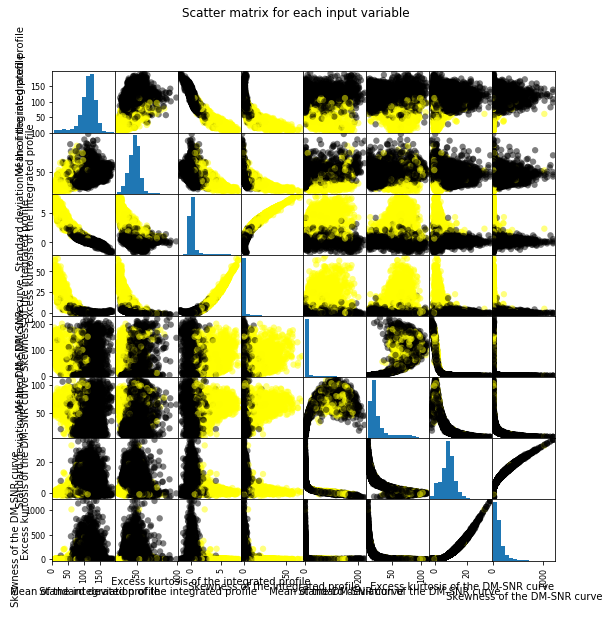

In [7]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x, c=y, marker='o', s=40, hist_kwds = {'bins': 15}, figsize=(9,9), cmap=cmap)

plt.suptitle("Scatter matrix for each input variable")
plt.show()

In [8]:
print(y.unique())

[0 1]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
print(y_train.shape)
print(y_test.shape)

(13423,)
(4475,)


In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
'''
model = tf.keras.models.Sequential()
layer1 = tf.keras.layers.Dense(128, input_shape = [8])
model.add(layer1)
layer2 = tf.keras.layers.Dense(64)
model.add(layer2)
layer3 = tf.keras.layers.Dense(20)
model.add(layer3)
model.add(tf.keras.layers.Dense(2, activation="softmax"))
'''

'\nmodel = tf.keras.models.Sequential()\nlayer1 = tf.keras.layers.Dense(128, input_shape = [8])\nmodel.add(layer1)\nlayer2 = tf.keras.layers.Dense(64)\nmodel.add(layer2)\nlayer3 = tf.keras.layers.Dense(20)\nmodel.add(layer3)\nmodel.add(tf.keras.layers.Dense(2, activation="softmax"))\n'

In [13]:
'''
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
'''

"\nmodel.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])\n"

In [14]:

model = keras.models.load_model('pulsar_star_predict_model.h5')


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 42        
Total params: 10,750
Trainable params: 10,750
Non-trainable params: 0
_________________________________________________________________


In [16]:
trained_model = model.fit(x_train, y_train, epochs = 250)

Epoch 1/250
13423/13423 [==============================] - 5s 368us/step - loss: 0.0261 - acc: 0.9739ETA: 1s - loss: 0.026
Epoch 2/250
13423/13423 [==============================] - 2s 151us/step - loss: 0.0261 - acc: 0.9739ETA:
Epoch 3/250
13423/13423 [==============================] - 2s 146us/step - loss: 0.0261 - acc: 0.9739
Epoch 4/250
13423/13423 [==============================] - 3s 197us/step - loss: 0.0261 - acc: 0.9739
Epoch 5/250
13423/13423 [==============================] - 3s 218us/step - loss: 0.0261 - acc: 0.9739
Epoch 6/250
13423/13423 [==============================] - 3s 216us/step - loss: 0.0261 - acc: 0.9739
Epoch 7/250
13423/13423 [==============================] - 3s 238us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0261 - acc:
Epoch 8/250
13423/13423 [==============================] - 2s 179us/step - loss: 0.0261 - acc: 0.9739
Epoch 9/250
13423/13423 [==============================] - 3s 205us/step - loss: 0.0261 - acc: 0.9739 1s - los
Epoch 10/250
13423/1342

13423/13423 [==============================] - 3s 233us/step - loss: 0.0261 - acc: 0.9739
Epoch 71/250
13423/13423 [==============================] - 3s 199us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.0260 - acc: 0.97
Epoch 72/250
13423/13423 [==============================] - 3s 241us/step - loss: 0.0261 - acc: 0.9739
Epoch 73/250
13423/13423 [==============================] - 3s 229us/step - loss: 0.0261 - acc: 0.9739
Epoch 74/250
13423/13423 [==============================] - 3s 234us/step - loss: 0.0261 - acc: 0.9739
Epoch 75/250
13423/13423 [==============================] - 3s 259us/step - loss: 0.0261 - acc: 0.9739
Epoch 76/250
13423/13423 [==============================] - 2s 173us/step - loss: 0.0261 - acc: 0.9739
Epoch 77/250
13423/13423 [==============================] - 3s 194us/step - loss: 0.0261 - acc: 0.9739 0s - loss: 0.026
Epoch 78/250
13423/13423 [==============================] - 3s 218us/step - loss: 0.0261 - acc: 0.9739
Epoch 79/250
13423/13423 [=============

13423/13423 [==============================] - 2s 154us/step - loss: 0.0261 - acc: 0.9739
Epoch 144/250
13423/13423 [==============================] - 2s 140us/step - loss: 0.0261 - acc: 0.9739
Epoch 145/250
13423/13423 [==============================] - 2s 148us/step - loss: 0.0261 - acc: 0.9739
Epoch 146/250
13423/13423 [==============================] - 3s 215us/step - loss: 0.0261 - acc: 0.9739TA: 1s - l - ETA: 1s - 
Epoch 147/250
13423/13423 [==============================] - 2s 179us/step - loss: 0.0261 - acc: 0.9739
Epoch 148/250
13423/13423 [==============================] - 2s 134us/step - loss: 0.0261 - acc: 0.9739 1s - 
Epoch 149/250
13423/13423 [==============================] - 2s 178us/step - loss: 0.0261 - acc: 0.9739
Epoch 150/250
13423/13423 [==============================] - 2s 166us/step - loss: 0.0261 - acc: 0.9739
Epoch 151/250
13423/13423 [==============================] - 2s 138us/step - loss: 0.0261 - acc: 0.9739 1s - 
Epoch 152/250
13423/13423 [================

13423/13423 [==============================] - 3s 249us/step - loss: 0.0261 - acc: 0.9739 ETA: 2s - loss: 0.02 - ETA: 2s - loss: 0.0271 - ac - ETA: 1s -
Epoch 213/250
13423/13423 [==============================] - 3s 231us/step - loss: 0.0261 - acc: 0.9739
Epoch 214/250
13423/13423 [==============================] - 3s 213us/step - loss: 0.0261 - acc: 0.9739
Epoch 215/250
13423/13423 [==============================] - 3s 202us/step - loss: 0.0261 - acc: 0.9739
Epoch 216/250
13423/13423 [==============================] - 3s 209us/step - loss: 0.0261 - acc: 0.9739
Epoch 217/250
13423/13423 [==============================] - 3s 228us/step - loss: 0.0261 - acc: 0.9739ETA: 3s - loss: 0.01
Epoch 218/250
13423/13423 [==============================] - 3s 205us/step - loss: 0.0261 - acc: 0.9739
Epoch 219/250
13423/13423 [==============================] - 3s 197us/step - loss: 0.0261 - acc: 0.9739
Epoch 220/250
13423/13423 [==============================] - 3s 189us/step - loss: 0.0261 - acc: 0.

In [17]:
score = model.evaluate(x_test, y_test)

4475/4475 [==============================] - 1s 220us/step


In [18]:
print("Model score: ", score)

Model score:  [0.020782122906692867, 0.9792178772281668]


In [19]:
print(trained_model.history.keys())

dict_keys(['loss', 'acc'])


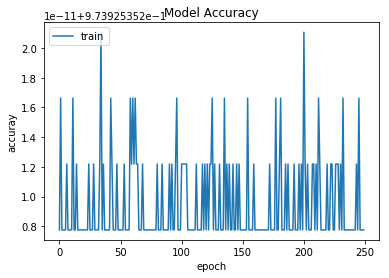

In [20]:
plt.plot(trained_model.history['acc'])
plt.title("Model Accuracy")
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [22]:

model.save('pulsar_star_predict_model.h5')
